<a href="https://colab.research.google.com/github/Le4o/topicos-avancados-ic/blob/main/reducao_de_dimensionalidade_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Redução de Dimensionalidade
#### Exercício da matéria de Tópicos Avançados em Inteligência Computacional

Grupo:
- João Victor de Sledz Bulhões
- Leonardo de Andrade Santana
- Lis da Silva Azevedo

### Definição do Exercício

CIFAR10 é dataset de 50.000 imagens coloridas de treinamento com resolução de 32x32 e 10.000 imagens de teste, rotuladas em 10 categorias.

Agora, a partir dos conhecimentos adquiridos até o momento, realizem a redução de dimensionalidade do dataset CIFAR10, comparando as técnicas e seus resultados. Após a redução, implementem uma rede neural para a classificação utilizando cada conjunto de dados(Normal, PCA, AE e VAE).

Como sempre, escrevam com capricho o trabalho, apresentem a análise exploratória, fundamentação, metodologia, resultados, discussões e conclusões, avaliando qualitativa e quantitativamente o desempenho do modelo gerado, utilizando todos os conceitos e métodos até aqui aprendidos.

Referência: https://keras.io/api/datasets/cifar10/

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Carregando dados utilizando o dataset do keras
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0
print('Número de imagens:', len(x_train))
print('Número de Imagens de teste:', len(x_test))

Número de imagens: 50000
Número de Imagens de teste: 10000


Imagem de número 500
Título: dog


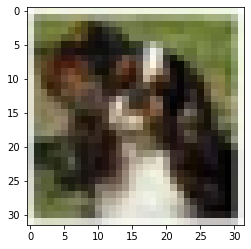

In [3]:
# Labels/tipos das imagens do dataset
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}

number_image = 500
print('Imagem de número', number_image)
print('Título:', label_dict[y_train[number_image][0]])
plt.imshow(x_train[number_image])

In [4]:
import pandas as pd

# Fazer o reshape das imagens de 3 para 1
# 32 x 32 x 3 = 3072
print('Shape do x_train: ', x_train.shape)
x_train_flat = x_train.reshape(-1,3072)
x_test_flat = x_test.reshape(-1,3072)
print('Shape do x_train_flat: ', x_train_flat.shape)

# Criando coluna para cada pixel
columns = ['c' + str(i) for i in range(x_train_flat.shape[1])]

# Criando o dataFrame e adicionando a coluna do target
df = pd.DataFrame(x_train_flat, columns=columns)
df['target'] = y_train
df


Shape do x_train:  (50000, 32, 32, 3)
Shape do x_train_flat:  (50000, 3072)


,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,c13,c14,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24,c25,c26,c27,c28,c29,c30,c31,c32,c33,c34,c35,c36,c37,c38,c39,...,c3033,c3034,c3035,c3036,c3037,c3038,c3039,c3040,c3041,c3042,c3043,c3044,c3045,c3046,c3047,c3048,c3049,c3050,c3051,c3052,c3053,c3054,c3055,c3056,c3057,c3058,c3059,c3060,c3061,c3062,c3063,c3064,c3065,c3066,c3067,c3068,c3069,c3070,c3071,target
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,0.211765,0.164706,0.384314,0.286275,0.203922,0.466667,0.356863,0.247059,0.545098,0.419608,0.294118,0.568627,0.431373,0.313725,0.584314,0.458824,0.349020,0.584314,0.470588,0.364706,0.513725,0.403922,0.301961,0.490196,0.388235,0.298039,0.556863,0.450980,0.356863,0.564706,...,0.580392,0.403922,0.301961,0.631373,0.411765,0.270588,0.564706,0.372549,0.215686,0.439216,0.352941,0.231373,0.466667,0.356863,0.227451,0.509804,0.376471,0.254902,0.470588,0.341176,0.231373,0.360784,0.262745,0.180392,0.403922,0.305882,0.223529,0.666667,0.549020,0.407843,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,0.396078,0.388235,0.490196,0.513725,0.545098,0.607843,0.650980,0.705882,0.674510,0.745098,0.823529,0.705882,0.780392,0.839216,0.556863,0.611765,0.611765,0.435294,0.470588,0.431373,0.415686,0.419608,0.384314,0.427451,0.407843,0.400000,0.482353,0.474510,0.458824,0.498039,...,0.019608,0.023529,0.043137,0.023529,0.023529,0.043137,0.039216,0.035294,0.047059,0.098039,0.086275,0.086275,0.200000,0.176471,0.164706,0.266667,0.250980,0.262745,0.352941,0.352941,0.396078,0.454902,0.443137,0.478431,0.525490,0.498039,0.521569,0.549020,0.509804,0.533333,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.298039,0.352941,0.352941,0.282353,0.337255,0.337255,0.250980,0.305882,0.305882,0.250980,0.305882,0.305882,0.270588,0.325490,0.325490,0.258824,0.313725,0.313725,0.215686,0.270588,0.270588,0.203922,0.258824,0.258824,0.227451,0.282353,0.282353,0.266667,0.313725,0.309804,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,0.145098,0.090196,0.172549,0.152941,0.098039,0.156863,0.145098,0.086275,0.156863,0.149020,0.090196,0.094118,0.090196,0.035294,0.125490,0.098039,0.058824,0.168627,0.105882,0.074510,0.117647,0.078431,0.039216,0.125490,0.117647,0.066667,0.160784,0.145098,0.090196,0.203922,...,0.478431,0.388235,0.262745,0.419608,0.333333,0.211765,0.439216,0.376471,0.258824,0.360784,0.317647,0.207843,0.313725,0.243137,0.152941,0.376471,0.305882,0.231373,0.301961,0.262745,0.164706,0.333333,0.298039,0.172549,0.329412,0.294118,0.188235,0.262745,0.223529,0.149020,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,0.756863,0.827451,0.709804,0.768627,0.854902,0.694118,0.764706,0.862745,0.709804,0.764706,0.874510,0.721569,0.752941,0.874510,0.741176,0.745098,0.874510,0.741176,0.741176,0.870588,0.737255,0.756863,0.878431,0.717647,0.760784,0.874510,0.713725,0.760784,0.874510,0.721569,...,0.364706,0.384314,0.400000,0.352941,0.372549,0.388235,0.345098,0.364706,0.380392,0.325490,0.349020,0.360784,0.301961,0.341176,0.345098,0.294118,0.329412,0.333333,0.278431,0.317647,0.321569,0.290196,0.313725,0.325490,0.282353,0.298039,0.309804,0.278431,0.294118,0.305882,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1
...,...,.

### PCA
Utilizando o `Principal Components Analysis (PCA)`.

In [ ]:
from sklearn.decomposition import PCA

n_components = 2
components_columns = ['C%d' % i for i in range(1, n_components+1)]

# Usando o método PCA com dois componentes
# e preparando para o fit_transform
pca = PCA(n_components=n_components)
components = pca.fit_transform(x_train_flat)

# Convertendo os novos dados de numpy array para um novo dataFrame
df_pca = pd.DataFrame(components, columns=components_columns)
df_pca['target'] = df['target'].copy()

df_pca 

,C1,C2,target
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1
...,...,...,...
49995,7.106037,-5.851024,2
49996,6.216884,1.898764,6
49997,0.707347,-11.342521,9
49998,11.367909,-3.375978,1


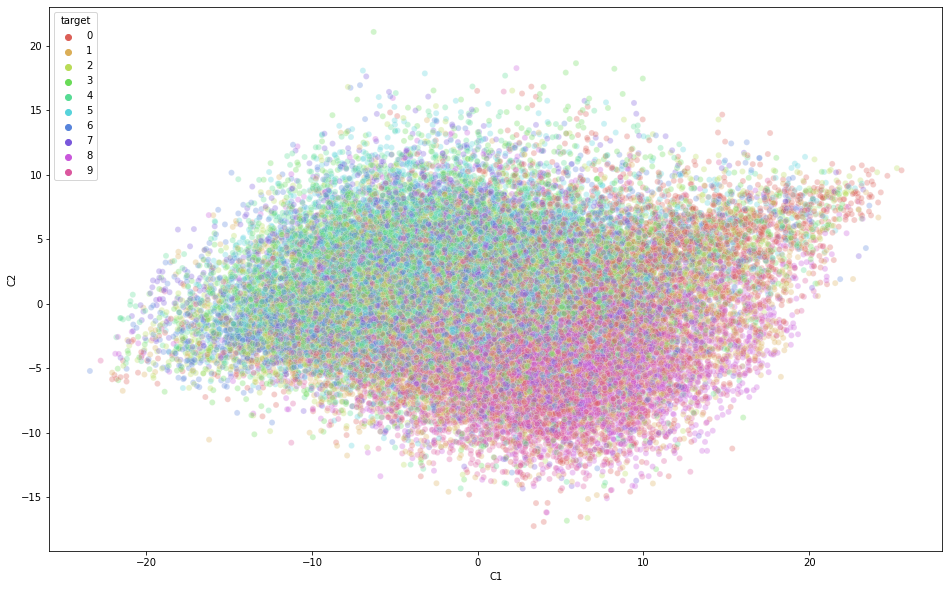

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="C1", y="C2",
    hue="target",
    palette=sns.color_palette("hls", 10),
    data=df_pca,
    legend="full",
    alpha=0.3
)

É possíver verificar que a variação foi capturada ao longo do componente X. Os pontos pertencentes à mesma classe estão próximos uns dos outros e as imagens que são muito diferentes estão mais distantes.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

pca_reconstructed = pca.inverse_transform(df_pca[components_columns])
MSE = mean_squared_error(df.iloc[:, :-1], pca_reconstructed)
MAE = mean_absolute_error(df.iloc[:, :-1], pca_reconstructed)
variance = pca.explained_variance_ratio_.sum()

In [ ]:
print('MSE: {:.2f}'.format(MSE))
print('MAE: {:.2f}'.format(MAE))
print('VARIANCE: {:.2f}'.format(variance))

MSE: 0.04
MAE: 0.15
VARIANCE: 0.40


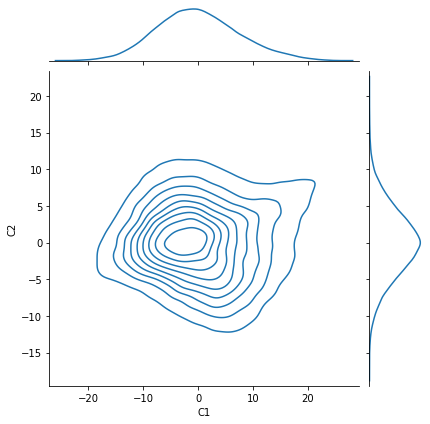

In [ ]:
sns.jointplot(data=df_pca, x='C1', y='C2', kind = 'kde')
plt.show()

### Autoenconder (AE)

Utilizando o `Autoenconding`

In [ ]:
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop

def autoencoder(input_img):
    # Encoder
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    # Decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 3
    return decoded

In [ ]:
batch_size = 128
epochs = 20
inChannel = 3
x, y = 32, 32
input_img = Input(shape = (x, y, inChannel))

autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())
autoencoder.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 128)         1475

In [ ]:
autoencoder_train = autoencoder.fit(x_train, x_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, x_test))
autoencoder_train

Epoch 1/20
391/391 [==============================] - 441s 1s/step - loss: 0.0205 - val_loss: 0.0093
Epoch 2/20
391/391 [==============================] - 434s 1s/step - loss: 0.0092 - val_loss: 0.0078
Epoch 3/20
391/391 [==============================] - 435s 1s/step - loss: 0.0072 - val_loss: 0.0073
Epoch 4/20
391/391 [==============================] - 435s 1s/step - loss: 0.0062 - val_loss: 0.0058
Epoch 5/20
391/391 [==============================] - 435s 1s/step - loss: 0.0055 - val_loss: 0.0047
Epoch 6/20
391/391 [==============================] - 435s 1s/step - loss: 0.0050 - val_loss: 0.0040
Epoch 7/20
391/391 [==============================] - 435s 1s/step - loss: 0.0046 - val_loss: 0.0043
Epoch 8/20
391/391 [==============================] - 434s 1s/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/20
391/391 [==============================] - 434s 1s/step - loss: 0.0041 - val_loss: 0.0048
Epoch 10/20
391/391 [==============================] - 434s 1s/step - loss: 0.0039 - val_lo

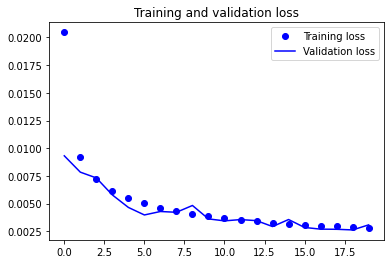

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

A linha de `Validation loss` está em sincronia com os valores de `Training Loss`, isso mostra que o modelo não está realizando `Overfitting`. Além disso, a linha está quase sempre decrescente, diminuindo.

Test Images


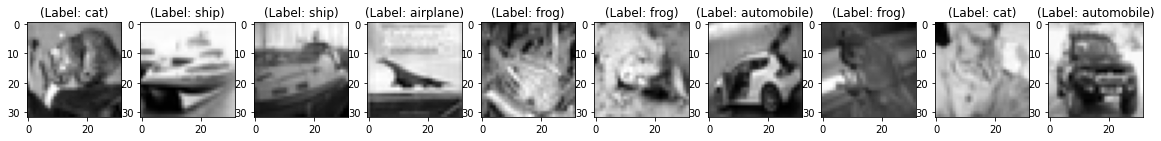

Reconstruction of Test Images


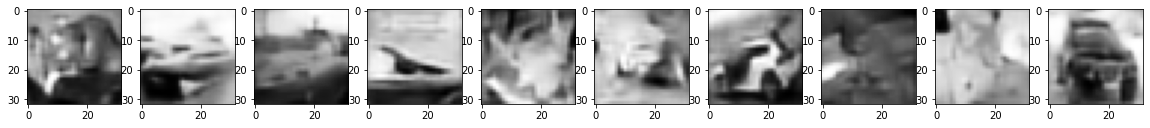

In [ ]:
pred = autoencoder.predict(x_test)

plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test[i, ..., 0], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(label_dict[curr_lbl[0]]) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()

### Variant Autoenconder (VAE)

Utilizando o `Autoenconding`

In [1]:
from tensorflow.keras import backend as K

# reparametrization trick
def sampling(args):
    z_mean, z_log_var = args
    
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    
    epsilon = K.random_normal(shape=(batch, dim))
    
    s = K.exp(0.5 * z_log_var)
    
    return z_mean + s * epsilon

In [5]:
n_components = 2
latent_dimension = n_components

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

encoder_input = Input(shape=(len(y_train),))

x = Dense(units=len(y_train)) (encoder_input)
x = ReLU() (x)

z_mean = Dense(units=latent_dimension, name="z_mean") (x)
z_log_var = Dense(units=latent_dimension, name="z_log_var") (x)

z = Lambda(sampling, name="z")([z_mean, z_log_var])


encoder = Model(encoder_input, z, name='encoder')
encoder.summary()

In [ ]:
decoder_input = Input(shape=(latent_dimension,))
x = Dense(units=len(iris.feature_names)) (decoder_input)
x = PReLU() (x)

decoder = Model(decoder_input, x, name='decoder')
decoder.summary()

In [ ]:
outputs = decoder(encoder(encoder_input))
vae = Model(encoder_input, outputs, name='variational_autoencoder')
vae.compile(loss='mse', metrics=['mae'], optimizer='adam')
vae.summary()

In [ ]:
history = vae.fit(
    x=x_train,
    y=x_train,
    batch_size=6,
    epochs=200,
    validation_split=0.3,
    verbose=0
)

In [ ]:
fig, ax = plt.subplots(ncols=len(vae.metrics_names), figsize=(12,5))

for i, metric in enumerate(vae.metrics_names):
    ax[i].plot(history.history[metric], label=metric, c='r')
    ax[i].plot(history.history['val_'+metric], label='val_'+metric, c='k')
    ax[i].legend()
    
plt.show()

In [ ]:
evals = vae.evaluate(x_test, x_test, verbose=0)
    
Markdown("""Variational Autoencoder

|  Métrica  |  Valor |
|:----------|:------:|
|    MSE    |  %.2f  |
|    MAE    |  %.2f  |

</center>
""" % (evals[0], evals[1]))

In [ ]:
components_VAE = encoder.predict(X)

df_VAE = pd.DataFrame(components_VAE, columns=components_columns)
df_VAE['target'] = df_iris['target'].copy()

df_VAE

In [ ]:
sns.scatterplot(data=df_VAE, x='C1', y='C2', hue='target')
plt.show()

In [ ]:
sns.jointplot(data=df_VAE, x='C1', y='C2', kind = 'kde')
plt.show()

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(len(x_train))
x_train[0].shape
print(y_train[i])
plt.imshow(x_train[501])

In [ ]:
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

encoder_input = Input(shape=(len(iris.feature_names),))
x = Dense(units=n_components) (encoder_input)
x = PReLU() (x)

encoder = Model(encoder_input, x, name='encoder')
encoder.summary()